In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
Dataset_path="Downloads/Bean_Dataset"
IMG_SIZE=(224,224)
SEED=42
BATCH_SIZE=32

In [4]:
train_ds= tf.keras.preprocessing.image_dataset_from_directory(
    Dataset_path,
    subset="training",
    validation_split=0.3,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    seed=SEED)
full_valid_ds = tf.keras.preprocessing.image_dataset_from_directory(
    Dataset_path,
    subset="validation",
    validation_split=0.3,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    seed=SEED)

train_size=len(train_ds)
val_size=len(full_valid_ds)//2
test_size = len(full_valid_ds)-val_size

valid_ds=full_valid_ds.take(val_size)
test_ds=full_valid_ds.take(val_size)

Found 990 files belonging to 3 classes.
Using 693 files for training.
Found 990 files belonging to 3 classes.
Using 297 files for validation.


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
num_classes=len(train_ds.class_names)
model=Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 128)               2

In [7]:
history=model.fit(
    train_ds,
    validation_data=valid_ds,
    epochs=10)

Epoch 1/10
22/22 [==============================] - 28s 1s/step - loss: 558.5196 - accuracy: 0.3593 - val_loss: 1.0677 - val_accuracy: 0.4938
Epoch 2/10
22/22 [==============================] - 28s 1s/step - loss: 1.0389 - accuracy: 0.5166 - val_loss: 1.0372 - val_accuracy: 0.4625
Epoch 3/10
22/22 [==============================] - 28s 1s/step - loss: 0.8149 - accuracy: 0.6465 - val_loss: 0.9888 - val_accuracy: 0.5437
Epoch 4/10
22/22 [==============================] - 27s 1s/step - loss: 0.5871 - accuracy: 0.7749 - val_loss: 1.0761 - val_accuracy: 0.5813
Epoch 5/10
22/22 [==============================] - 28s 1s/step - loss: 0.3698 - accuracy: 0.8629 - val_loss: 1.1930 - val_accuracy: 0.5250
Epoch 6/10
22/22 [==============================] - 28s 1s/step - loss: 0.2086 - accuracy: 0.9452 - val_loss: 1.1497 - val_accuracy: 0.5375
Epoch 7/10
22/22 [==============================] - 27s 1s/step - loss: 0.2022 - accuracy: 0.9654 - val_loss: 1.6174 - val_accuracy: 0.5250
Epoch 8/10
22/22 [

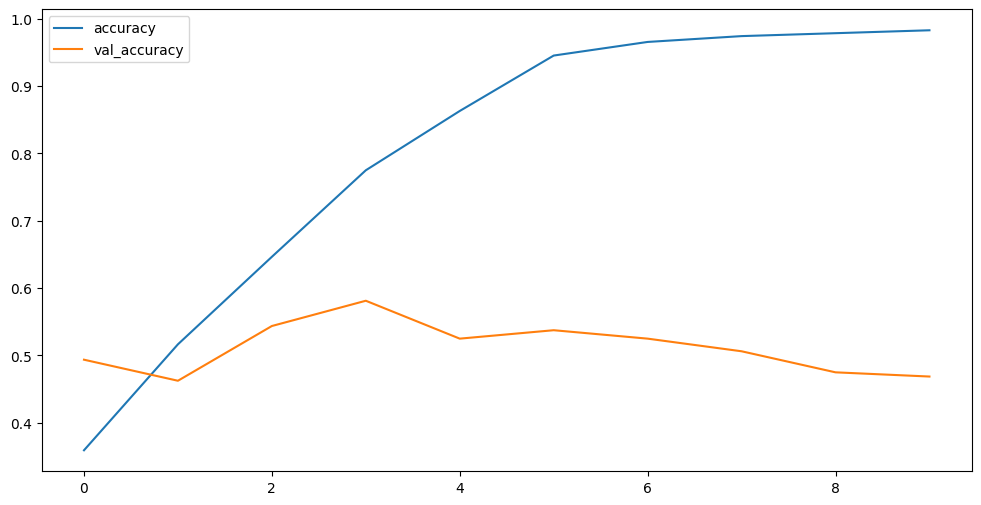

In [8]:
plt.figure(figsize=(12,6))
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [9]:
test_loss,test_accuracy=model.evaluate(valid_ds)
print("Test Accuracy:", test_accuracy)

5/5 [==============================] - 2s 256ms/step - loss: 3.4842 - accuracy: 0.4375
Test Accuracy: 0.4375


In [10]:
y_pred=np.argmax(model.predict(test_ds),axis=-1)
y_true=np.concatenate([y for x,y in test_ds], axis=0)


5/5 [==============================] - 2s 245ms/step


In [14]:
from sklearn.metrics import classification_report, confusion_matrix
class_names = train_ds.class_names
print("Classification Report:")
print(classification_report(y_true,y_pred,target_names=class_names))
print("Confusion matrix:")
print(confusion_matrix(y_true,y_pred))

Classification Report:
                   precision    recall  f1-score   support

angular_leaf_spot       0.15      0.10      0.12        50
        bean_rust       0.28      0.49      0.35        49
          healthy       0.36      0.23      0.28        61

         accuracy                           0.27       160
        macro avg       0.26      0.27      0.25       160
     weighted avg       0.27      0.27      0.25       160

Confusion matrix:
[[ 5 30 15]
 [15 24 10]
 [14 33 14]]


1/1 [==============================] - 0s 80ms/step


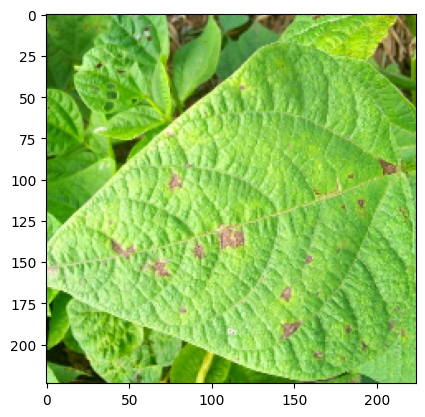

[[0.97254646 0.00109183 0.02636177]]
Predicted class: [[1 0 0]]


In [15]:
import numpy as np
for images, labels in test_ds.take(1):
    single_image=images[0].numpy()
    break
batch_img=np.expand_dims(single_image, axis=0)
y_pred=model.predict(batch_img)
plt.imshow(single_image.astype(np.uint8))
plt.show()
print(y_pred)
predicted_class = (y_pred>0.5).astype(int)
print("Predicted class:", predicted_class)